# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [ ]:
%matplotlib inline 

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import * 

# Visa interface for the M8190A instrument:

In [2]:
M8190A = VisaR(AWG_S2,60000)

In [4]:
Initialization(M8190A,AWG_S2)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments DC1 Output Voltage set to 3.00000000000000E-01deciVolts


In [3]:
M8190A.write('*RST')

5

In [6]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


# Quering Instrument Settings

In [ ]:
#Understanding the structure of the SEQ:DATA command

#M8190A.write('[:SOURce]:SEQuence[1|2]:DATA <sequence_id>,<step>,[<value>,<value>,…|<data block>] <segment_id>, <loop_count>,<advance_mode>,<marker_enable>, <start_addr>,<end_addr>

#M8190A.query('[:SOURce]:SEQuence[1|2]:DATA? <sequence_id>,<step>,<length>')

#<advance_mode> 0: AUTO, 1: CONDitional, 2: REPeat, 3: SINGle. Specifies how the generator advances from one sequence table entry to the next one.

In [ ]:
M8190A.query('SYST:ERR?')

# Marker Subsystem

Import the marker sample data through cvs with the following order:

" M8190A User’s Guide 287
CSV

_ Normalized values (-1.0 .. +1.0) and markers in comma delimited format. The file can contain either 1 (waveform data for channel 1), 2 (waveform data for channel 1 & 2), 3 (waveform data, sample marker, sync marker for channel 1) or 6 (waveform data, sample marker, sync marker for channel 1 and 2) columns. If the file contains data for two channels, it will be treated as IQ file._

While trying to write a sinus function throught the marker channel:

_"-300,"Device-specific error;CH1: Error in file ""Puls1.csv""(line: 1): Marker data ""-1.00E-10"" is not valid. Marker data can be either 1 or 0."'"_


# Sequence for a 100 Hz marker syncronization

## Sync clock / Sequencer Clock

The data generation consists of a Sample Memory which contains the sample data, a Sequence Memory which contains the required information for sequencing like the sequence structure or loop counter values and a Channel FPGA which combines both into a sequence controlled sample stream. These parts cannot run at sample clock rate and therefore multiple samples must be executed in parallel at a lower clock speed. **Depending on the selected direct mode, the Sync Clock, also called Sequencer Clock is the sample clock divided by 64 (high speed mode) or by 48 (high precision mode)**. When using the interpolated modes (refer to the chapter Digital Up-Conversion), one Sync Clock cycle covers 24 delivered (not interpolated) IQ sample pairs. Therefore, a sync clock cycle consists of “24*interpolation factor” DAC samples.
The DAC converts the parallel sample stream to sample clock granularity. The analog output of the DAC can either be used directly at the DIRECT OUT pin or can be routed through two different available amplifier paths.

3.1.3 Sequencer Granularity

The sequencer is running at a lower clock speed than the sample rate of the instrument.
Therefore the sequencer has to play multiple samples within one sync clock cycle.
The number of samples played within one sync clock cycle is called sequencer
granularity or segment granularity. For details, refer to the block diagram in section


## Instrument Settings:


## Creating the Segments with the Sweep code

In [ ]:
M8190A.query('SYST:ERR?')

## Initializing the sequences

Depending on the selected direct mode, the Sync Clock, also called Sequencer Clock is the sample clock divided by 64 (high speed mode) or by 48 (high precision mode)

# ROLE MODEL

In [ ]:
Pulses_List

In [ ]:
5e-3*125e6

In [ ]:
a = 125e6 * 48
b = 5e-3 *a 
c = b/48

In [ ]:
b

In [ ]:
_/48

125e6 * 48

In [ ]:
M8190A.query('SYST:ERR?')

In [ ]:
M8190A.write('TRAC:DWID WSP')

In [ ]:
M8190A.write('TRAC:DWID INTX12')

In [ ]:
M8190A.query('TRAC1:DWID?')

In [ ]:
M8190A.write('TRAC:DWID WPR')

In [ ]:
M8190A.query('SEQ:CAT?')

Sampling frecuency has some effect with the segmentation for the sequences, changing it from 125Mhz to 1Ghz made it so 6 repetitions of the segments transform into 3. Still have to play with this.

tomorrow: do a run with the 7.2 GHz sample rate and see if I get individual segments per sequences, as desired

In [ ]:
M8190A.query('ROSC:SOUR:CHEC? INT')

In [ ]:
M8190A.query('STAT:QUES:SEQ?')

### Animation

In [ ]:
%matplotlib notebook
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 32), ylim=(0, 11))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
line, = ax.plot([], [], color='black')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  We iterate over p and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,32,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps P

# Misc. SCPI commands

In [ ]:
M8190A.query('SEQ:FREE?')

In [ ]:
M8190A.query('FUNC1:MODE?')

In [ ]:
M8190A.query('MMEM:CAT?')

In [ ]:
M8190A.query('SYST:SET?')

In [ ]:
M8190A.query('*OPC?') #this is for checking that the previous commands were completed

In [ ]:
M8190A.write('*CLS')

In [ ]:
M8190A.write('*RST') #Reseting the instrument to factory settings

In [ ]:
M8190A.write('TRAC1:DEL:ALL') #Delets the stored segments in the instrument

In [ ]:
M8190A.write('ABOR') #self explanatory

Sequences are visualized in Tables, each table entry corresponds to a segment.

Users Manaual page 251:

_"Sequences are made of a number of arbitrary waveforms, which can be linked and looped in user-programmable order. Sequences are generated from waveforms stored in the waveform memory as memory segments."_

A segment corresponds to a waveform (just one?), i.e. some sample data with a corresponding sampling rate frecuency.

:TRAC subsystem to generate segments ($\checkmark$)

:SEQ subsystem to generate sequences.

Trigger for seq A and advance for seq b ??

Internal Trigger Generator

reference oscillator


usual data loaded, internal frecuency set at 15 kHz, sequence is repeted after a time interval of roughly 52us, below this internal frecuency, there is only one sequence displayed.

Advancent/ event triggering due to internal clock related to marker syncronization?

In [ ]:
M8190A.query('OUTP:ROUT?')

# Pulse Segments for different $\Delta\tau$

In [ ]:
start = time.time()

obo,tom = Tau(Pulses_List,10,13,625000,0,10)
obo2,tom = Tau(Pulses_List,10,13,625000,5,10)
obo3,tom = Tau(Pulses_List,10,13,625000,4,6)
#Data_Frames = TDF_CVS(obo,AWG_S1,'A')

end = time.time()

print(end - start)

In [ ]:
15e-3*AWG_S1['Clock Sample Frecuency']

In [ ]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(tom,obo3[0],label= 'Starting Step = 4')
plt.plot(tom,obo3[1],label= '5')
plt.plot(tom,obo3[2],label= 'Stopping Step = 6')
#plt.plot(tom,obo[7],label= '8')
#plt.plot(tom,obo[8],label= '4')
#plt.plot(tom,obo[9],label= '5')
#plt.plot(tom,obo[10],label= '10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [4,6] ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [ ]:
Pulses_List

In [ ]:
obo3.shape

In [ ]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(tom,obo[0],label= 'Starting Step 0')
plt.plot(tom,obo[1],label= '1')
plt.plot(tom,obo[2],label= '2')
plt.plot(tom,obo[3],label= '3')
plt.plot(tom,obo[4],label= '4')
plt.plot(tom,obo[5],label= '5')
plt.plot(tom,obo[6],label= '6')
plt.plot(tom,obo[7],label= '7')
plt.plot(tom,obo[8],label= '8')
plt.plot(tom,obo[9],label= '9')
plt.plot(tom,obo[10],label= 'Stopping Step 10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title(' Complete Sweeping Steps ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [ ]:
len(obo)

In [ ]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(tom,obo2[0],label= 'Starting Step = 5')
plt.plot(tom,obo2[1],label= '6')
plt.plot(tom,obo2[2],label= '7')
plt.plot(tom,obo2[3],label= '8')
plt.plot(tom,obo2[4],label= '9')
plt.plot(tom,obo2[5],label= 'Stopping Step =10')
#plt.plot(tom,obo[10],label= '10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title(' Partial Sweeping Steps [5,10]')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

Maybe I should add a key to the AWG dictionaries that is the intended time length of the pulse, that way I could also rename the csv files relatively easy to inlcude this parameter for more data file clarity.

## For sampling frecuency 500Mhz

In [5]:
M8190A.write('FREQ:RAST 500000000')

20

In [ ]:
M8190A.query('FREQ:RAST?')

In [ ]:
5e-3 * 500000000

In [ ]:
SeqF(M8190A,r'D:\Alejandro\Pulses\Dict\SegmentA_2500000_2.csv',r'D:\Alejandro\Pulses\Dict\SegmentB_2500000_2.csv',1)

In [6]:
Segment_Array(M8190A,1,pl,AWG_S1,1,0)

Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]


('D:\\Alejandro\\Pulses\\Dict\\SegmentA_2500000_0.csv',
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.666667            1              1
 2        0.666667            1              1
 3        0.666667            1              1
 4        0.666667            1              1
 ...           ...          ...            ...
 2499995  0.666667            1              1
 2499996  0.666667            1              1
 2499997  0.666667            1              1
 2499998  0.666667            1              1
 2499999  0.666667            1              1
 
 [2500000 rows x 3 columns])

In [ ]:
pl, tim= Sweept(Pulses_List,10,2,15,7500000)

In [9]:
Sequence_File(M8190A,r'D:\Alejandro\Pulses\Dict\SegmentA_7500000_0.csv',r'D:\Alejandro\Pulses\Dict\SegmentB_7500000_0.csv',1)

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"


In [13]:
M8190A.query('SYST:ERR?')

'0,"No error"'

# This should work

In [6]:
#Pulse Sequence for sampling rate at 500Mhz, 5ms time length

start = time.time()

pl, tim= Sweept(Pulses_List,10,2,15,7500000)
pln, tim= Sweept(Pulses_List2,10,2,15,7500000)

Sequence_Array(M8190A,pl,pln,AWG_S2,0,1)
M8190A.write('INIT:IMM')


end = time.time()

print(end - start)

Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]
Current Segment Catalogue is 1,7500000,2,7500000  [(segment id, Segment size)]
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
109.57121562957764


In [13]:
Segment_Array(M8190A,1,pl,AWG_S1,1,0)

Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]


('D:\\Alejandro\\Pulses\\Dict\\SegmentA_7500000_0.csv',
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.666667            1              1
 2        0.666667            1              1
 3        0.666667            1              1
 4        0.666667            1              1
 ...           ...          ...            ...
 7499995  0.000000            1              1
 7499996  0.000000            1              1
 7499997  0.000000            1              1
 7499998  0.000000            1              1
 7499999  0.000000            1              1
 
 [7500000 rows x 3 columns])

In [15]:
M8190A.query('TRAC1:CAT?')

'1,7500000,2,7500000'

In [15]:
M8190A.write(':TRAC1:SEL 1') 

13

In [17]:
M8190A.write('INIT:IMM')

9

In [14]:
M8190A.write('ABOR')

5

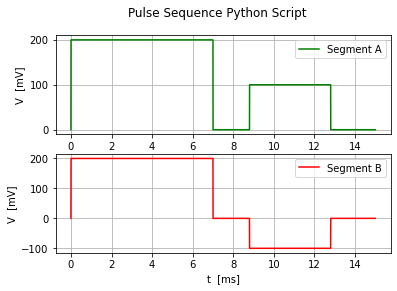

In [8]:
fig,ax= plt.subplots(2)

ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Pulse Sequence Python Script')

ax[0].plot(tim,pl,'-g',label= 'Segment A')
ax[1].plot(tim,pln,'-r',label= 'Segment B')
ax[0].set_ylabel('V  [mV]')
ax[1].set_ylabel('V  [mV]')
ax[0].set_xlabel('t  [ms]')
ax[1].set_xlabel('t  [ms]')

#ax[0].set_title(' Pulse Sequence Python Script ')

ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()
fig.savefig('PulseSequence_15ms_500Mhz_AmpIs',bbox_inches='tight')

In [9]:
Instrument_Settings(M8190A)

In [ ]:
SeqF(M8190A,r'D:\Alejandro\Pulses\Dict\SegmentA_2500000_2.csv',r'D:\Alejandro\Pulses\Dict\SegmentB_2500000_2.csv',1)

In [ ]:
Ch1_5ms_500Mhz_l2 = pd.read_csv(r'D:\Alejandro\Pulses\Characterization\Pulses\Different loop number\500MHz 5ms\2 loops\ALL0000\F0000CH1.csv')
Ch3_5ms_500Mhz_l2 = pd.read_csv(r'D:\Alejandro\Pulses\Characterization\Pulses\Different loop number\500MHz 5ms\2 loops\ALL0000\F0000CH3.csv')

In [ ]:
a = M8190A.query('TRAC1:DEF:NEW? 30000000')
M8190A.query('*OPC?')

M8190A.write('TRAC1:IQM {segid},"{location}",CSV,BOTH,ON,ALEN'.format( segid = int(a), location = r'D:\Alejandro\Pulses\Dict\SegmentA_30000000_2.csv') )

In [ ]:
M8190A.write('TRAC1:IQIM 2,"{location}", CSV,BOTH, ON, ALEN'.format( location  = r'D:\Alejandro\Pulses\Dict\SegmentA_30000000_2.csv'))
#M8190A.write('TRAC1:NAME , "Positive Pump"')

In [ ]:
M8190A.write('INIT:IMM')

In [ ]:
M8190A.query('SYST:ERR?')

<padding>: This parameter is optional and specifies the padding type.
 ALENgth: Automatically determine the required length of the segment. If the segment does not exist, it is created. After execution the segment has exactly the length of the pattern in file or a multiple of this length to fulfill granularity and minimum segment length requirements. This is the default behavior.
 FILL: The segment must exist, otherwise an error is returned. If the pattern in the file is larger than the defined segment length, excessive samples are ignored. If the pattern in the file is smaller than the defined segment length, remaining samples are filled with the value specified by the <init_value|> and <init_valueQ>parameter.

In [ ]:
M8190A.query('SYST:ERR?')

# Iteration

In [3]:
LocA,DFA,timm = Swep_Iteration_csv(PScheme,10,15,650000,4,6,AWG_S1,1)

In [4]:
LocB,DFB,timm = Swep_Iteration_csv(PScheme2,10,15,650000,4,6,AWG_S1,0)

In [5]:
LocA

{'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\SegmentA_650000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\Dict\\SegmentA_650000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\Dict\\SegmentA_650000_6.csv'}

In [6]:
LocB

{'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\SegmentB_650000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\Dict\\SegmentB_650000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\Dict\\SegmentB_650000_6.csv'}

In [7]:
for i in LocB:
    print(LocB[i])

D:\Alejandro\Pulses\Dict\SegmentB_650000_4.csv
D:\Alejandro\Pulses\Dict\SegmentB_650000_5.csv
D:\Alejandro\Pulses\Dict\SegmentB_650000_6.csv


In [8]:
DFA

{'SegmentA_650000_4':               Y1  SyncMarker1  SampleMarker1
 0       0.000000            1              1
 1       0.666667            1              1
 2       0.666667            1              1
 3       0.666667            1              1
 4       0.666667            1              1
 ...          ...          ...            ...
 649995  0.000000            1              1
 649996  0.000000            1              1
 649997  0.000000            1              1
 649998  0.000000            1              1
 649999  0.000000            1              1
 
 [650000 rows x 3 columns],
 'SegmentA_650000_5':               Y1  SyncMarker1  SampleMarker1
 0       0.000000            1              1
 1       0.666667            1              1
 2       0.666667            1              1
 3       0.666667            1              1
 4       0.666667            1              1
 ...          ...          ...            ...
 649995  0.000000            1              1
 649996 

In [9]:
DFA['SegmentA_650000_4'].iloc[:,0]

0         0.000000
1         0.666667
2         0.666667
3         0.666667
4         0.666667
            ...   
649995    0.000000
649996    0.000000
649997    0.000000
649998    0.000000
649999    0.000000
Name: Y1, Length: 650000, dtype: float64

In [14]:
DFB

{'SegmentB_650000_4':               Y1  SyncMarker1  SampleMarker1
 0       0.000000            0              0
 1      -0.666667            0              0
 2      -0.666667            0              0
 3      -0.666667            0              0
 4      -0.666667            0              0
 ...          ...          ...            ...
 649995  0.000000            0              0
 649996  0.000000            0              0
 649997  0.000000            0              0
 649998  0.000000            0              0
 649999  0.000000            0              0
 
 [650000 rows x 3 columns],
 'SegmentB_650000_5':               Y1  SyncMarker1  SampleMarker1
 0       0.000000            0              0
 1      -0.666667            0              0
 2      -0.666667            0              0
 3      -0.666667            0              0
 4      -0.666667            0              0
 ...          ...          ...            ...
 649995  0.000000            0              0
 649996 

In [21]:
s = "At least, that's what {pronoun} told me.".format(pronoun="he" if gender == "male" else "she")

print("Printed inmediately")
time.sleep(10)
print("Printed after 10 seconds")

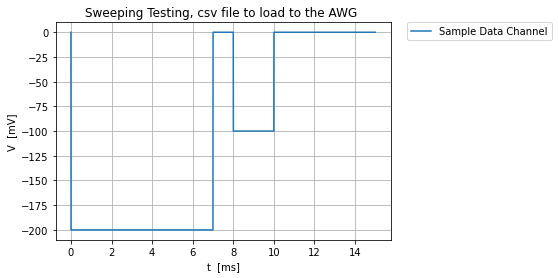

In [16]:

fig,ax= plt.subplots()

ax.grid(True)


plt.plot(timm,DFB['SegmentB_650000_4'].iloc[:,0]*300,label= 'Sample Data Channel')
#plt.plot(timm,DFB['SegmentB_650000_4'].iloc[:,0],label= 'Marker Channel',color= 'purple')
ax.set_xlabel('t  [ms]')
ax.set_ylabel('V  [mV]')
ax.set_title('Sweeping Testing, csv file to load to the AWG ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#fig.savefig('Pulse_reading_15ms_500MHz',optimize=True,bbox_inches='tight')

In [ ]:
for i in LocB:
    print(LocB[i])

In [30]:
from time import sleep

In [34]:
len(LocA)

3

In [10]:
for i,j in zip(LocA, LocB):
    print(LocA[i],LocB[j])
    print("INIT:IMM")
    sleep(10)
    print("ABORT")

D:\Alejandro\Pulses\Dict\SegmentA_650000_2.csv D:\Alejandro\Pulses\Dict\SegmentB_650000_2.csv
INIT:IMM
ABORT
D:\Alejandro\Pulses\Dict\SegmentA_650000_3.csv D:\Alejandro\Pulses\Dict\SegmentB_650000_3.csv
INIT:IMM
ABORT
D:\Alejandro\Pulses\Dict\SegmentA_650000_4.csv D:\Alejandro\Pulses\Dict\SegmentB_650000_4.csv
INIT:IMM
ABORT


In [6]:
start = time.time()

obo3,tom = Sweep_Iteration(PScheme,5,20,625000,2,4)

end = time.time()

print(end-start)

9.477867603302002


In [7]:
start = time.time()

obo3n,tom = Sweep_Iteration(PScheme2,5,20,625000,2,4)

end = time.time()

print(end-start)

9.405361413955688


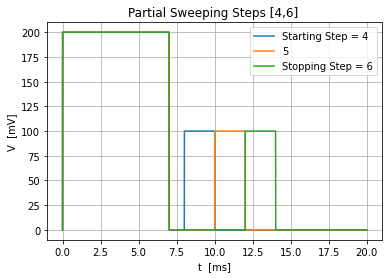

In [8]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(tom,obo3[0],label= 'Starting Step = 4')
plt.plot(tom,obo3[1],label= '5')
plt.plot(tom,obo3[2],label= 'Stopping Step = 6')
#plt.plot(tom,obo[7],label= '8')
#plt.plot(tom,obo[8],label= '4')
#plt.plot(tom,obo[9],label= '5')
#plt.plot(tom,obo[10],label= '10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [4,6] ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

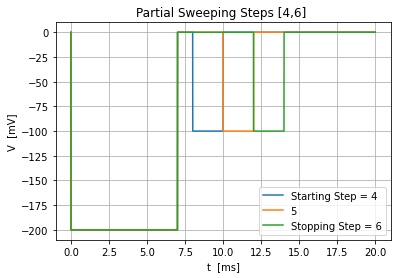

In [9]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(tom,obo3n[0],label= 'Starting Step = 4')
plt.plot(tom,obo3n[1],label= '5')
plt.plot(tom,obo3n[2],label= 'Stopping Step = 6')
#plt.plot(tom,obo[7],label= '8')
#plt.plot(tom,obo[8],label= '4')
#plt.plot(tom,obo[9],label= '5')
#plt.plot(tom,obo[10],label= '10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [4,6] ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [8]:
tic = time.time()

LocA,DFA,timm = Swep_Iteration_csv(PScheme,5,15,650000,2,4,AWG_S2,1)
LocB,DFB,timm = Swep_Iteration_csv(PScheme2,5,15,650000,2,4,AWG_S2,0)

toc = time.time()
print(toc - tic)

26.925537109375


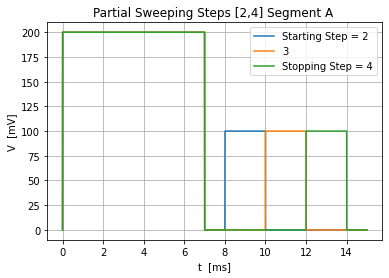

In [21]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(timm,DFA['SegmentA_650000_2'].iloc[:,0]*AWG_S1['Voltage Amplitude'],label= 'Starting Step = 2')
plt.plot(timm,DFA['SegmentA_650000_3'].iloc[:,0]*AWG_S1['Voltage Amplitude'],label= '3')
plt.plot(timm,DFA['SegmentA_650000_4'].iloc[:,0]*AWG_S1['Voltage Amplitude'],label= 'Stopping Step = 4')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [2,4] Segment A ')

ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

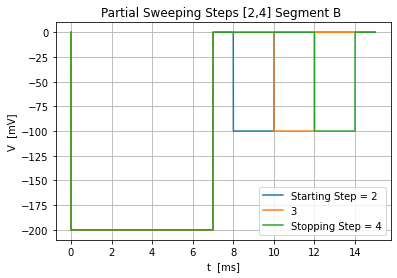

In [19]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(timm,DFB['SegmentB_650000_2'].iloc[:,0]*AWG_S1['Voltage Amplitude'],label= 'Starting Step = 2')
plt.plot(timm,DFB['SegmentB_650000_3'].iloc[:,0]*AWG_S1['Voltage Amplitude'],label= '3')
plt.plot(timm,DFB['SegmentB_650000_4'].iloc[:,0]*AWG_S1['Voltage Amplitude'],label= 'Stopping Step = 4')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [2,4] Segment B ')

ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [22]:
for i,j in zip(LocA, LocB):
    print(LocA[i],LocB[j])
    print("INIT:IMM")
    sleep(10)
    print("ABORT")

D:\Alejandro\Pulses\Dict\SegmentA_650000_2.csv D:\Alejandro\Pulses\Dict\SegmentB_650000_2.csv
INIT:IMM
ABORT
D:\Alejandro\Pulses\Dict\SegmentA_650000_3.csv D:\Alejandro\Pulses\Dict\SegmentB_650000_3.csv
INIT:IMM
ABORT
D:\Alejandro\Pulses\Dict\SegmentA_650000_4.csv D:\Alejandro\Pulses\Dict\SegmentB_650000_4.csv
INIT:IMM
ABORT


In [9]:
Sequence_Loader(M8190A,LocA,LocB,1,40)

Sequence loaded with the following segment data "1,1,0,1,0,1949999,2,1,0,1,0,1949999"
Sequence loaded with the following segment data "1,1,0,1,0,1949999,2,1,0,1,0,1949999"
Sequence loaded with the following segment data "1,1,0,1,0,1949999,2,1,0,1,0,1949999"
121.58446860313416


In [ ]:
M8190A.write('*RST')